## This file contains a function for plotting best features after feature selections 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#from sklearn.feature_selection import VarianceTreshold
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.model_selection import train_test_split

In [3]:
feature_data = "feature_data.csv"
feature_df = pd.read_csv(feature_data)
metadata = "metadata.csv"
df = pd.read_csv(metadata)

In [4]:
file_data = 'metadata_withmasks.csv'
image_folder = 'test_images' + os.sep
mask_folder = 'test_images_masks' + os.sep
file_features = 'feature_data.csv'

In [5]:
# Extract image ids and labels
df = pd.read_csv(file_data)

# Remove images without masks
df_mask = df['mask'] == 1
df = df.loc[df_mask]

labels = list(df['diagnostic'])

In [11]:
X_train , X_test, y_train, y_test = train_test_split(feature_df, labels, test_size = 0.30, random_state = 42)

[0.         0.01040139 0.10824806 0.01174092 0.00071048 0.0896793
 0.03484027 0.12644331 0.01543697 0.         0.         0.        ]


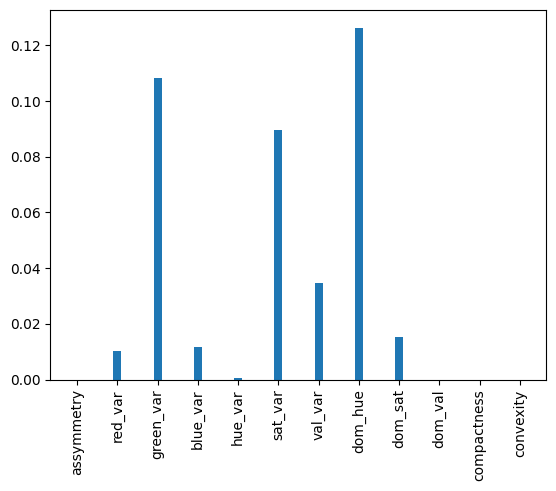

In [18]:
def feature_scores(train_X, train_y, k):
    '''Using SelectKBest to extract features from train_X, down to k features as output
    Returns a selector object (which is applied to X_train and X_test afterwards) 
	and the score for each feature.

    Args:
        train_X (pandas.DataFrame): Data Frame of features from X_train.
		train_y (pandas.DataFrame): Data Frame of target values from y_train.
        k (int): Number of features to output.

    Returns:
		feature_selector (selector object): 
        scores (numpy.ndarray): Array containg scores for each feature.    
    '''
    feature_selector = SelectKBest(mutual_info_classif, k=k)
    feature_selector.fit_transform(train_X, train_y)
    
    scores = feature_selector.scores_
    
    return feature_selector, scores

selector, scores = feature_scores(X_train, y_train, 4)

print(selector.scores_)

def plot_feature_scores(scores, X_train):
    # Get no. of features
    features = len(scores)

    # Visualize feature scores
    plt.bar(np.arange(0,features), scores, width=.2)
    plt.xticks(np.arange(0,features), list(X_train.columns), rotation='vertical')
    plt.show()

plot_feature_scores(scores, X_train)
